# Machine Learning: Salary predection using Linear Regression Model

## Importing required Libraries

In [1]:
import pandas as pd #  for data manipulation
import matplotlib.pyplot as plt # for visualizing the data
from sklearn.model_selection import train_test_split # automatically split the data into training and testing data
from sklearn.linear_model import LinearRegression  # Linear regression mode used to predict
import joblib # for saving the model after training

## Loading the DataSet

In [2]:
# reading the dataaset using pandas read_csv function
data = pd.read_csv('Salary_Data.csv')
data.head() # shows the first 5 rows of the data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.shape # size of the data (row,col)

(30, 2)

In [4]:
data.describe() # descrite the general satistics of the data

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
data.info() # describe the summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## Visualizing the dataset

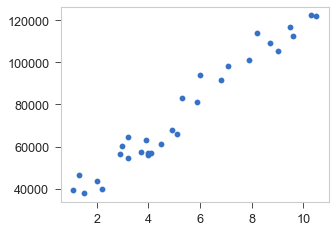

In [6]:
# plotting the data in scatter plot
X = data['YearsExperience'] # assigning the 1st col to X variable
Y = data['Salary'] # assigning the 2nd col to Y variable
plt.scatter(X,Y)

In [7]:
# from the above fig it is clear that the data trend here match the linear regression so we will be using LR model.

## Processing the dataset

In [8]:
# Splitting the data into two parts training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.30, random_state=30) # splits the data automatically 

In [9]:
# knowing the size
print("X_train-> ",X_train.shape)
print("X_test-> ",X_test.shape)
print("y_train-> ",y_train.shape)
print("y_test-> ",y_test.shape)

X_train->  (21,)
X_test->  (9,)
y_train->  (21,)
y_test->  (9,)


## Training The data

In [10]:
# defining the model
model = LinearRegression()

In [11]:
# training the model
X_train, X_test = X_train.values.reshape(21,1), X_test.values.reshape(9,1) # reshaping the data to 2D array
y_train, y_test = y_train.values.reshape(21,1), y_test.values.reshape(9,1) # reshaping the data to 2D array
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predecting

In [12]:
# Predecting on the testing data
y_pred = model.predict(X_test)

In [13]:
y_pred

array([[ 71527.04427312],
       [124698.55442095],
       [116821.29365831],
       [ 61680.46831981],
       [108944.03289567],
       [ 34110.05565056],
       [ 54787.8651525 ],
       [ 52818.54996184],
       [111898.00568166]])

## Accuracy

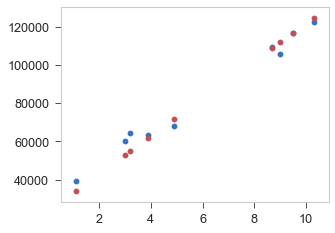

In [14]:
plt.scatter(X_test,y_test)# actual values in blue
plt.scatter(X_test,y_pred,color='r') # predecticed values in red

## Saving the model

In [15]:
joblib.dump(model, 'salary_model.pk1')

['salary_model.pk1']

## Predecting bby using the alderady trained model

In [16]:
model=joblib.load('salary_model.pk1')

In [17]:
def predict_salary(X):
    return model.predict(X)

In [18]:
# taking year of experince as input and predicting salary
exp=float(input("Enter the year of experince: "))
sal=predict_salary(np.array(exp).reshape(1,1))
print("Estimated Salary : ",sal[0][0])

Enter the year of experince: 6
Estimated Salary :  82358.27782174859
